### Matplotlib

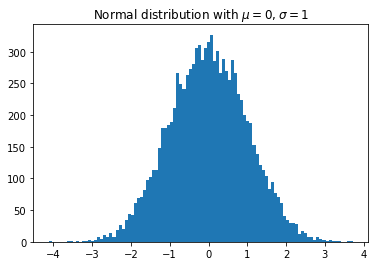

In [1]:
# histogram of random generated numbers
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x,100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.show()

In [2]:
# pandas
import pandas as pd

df = pd.DataFrame({'India': [8880, 8670, 8147, 7338, 5704],
                   'China': [5123, 6682, 3308, 1863, 5704]},
                  index = ['1980', '1981', '1982', '1983', '1984'])
df.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,5704


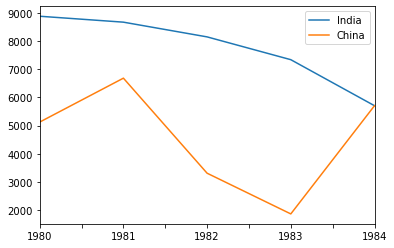

In [3]:
df.plot(kind='line')

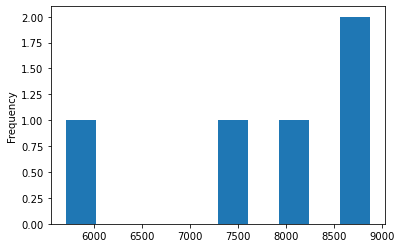

In [4]:
df['India'].plot(kind='hist')

-----------------------------------------------------------------------------------

### Dataset on immigration to Canada

In [5]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name = 'Canada by Citizenship',
                       skiprows = range(20),
                       skipfooter = 2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


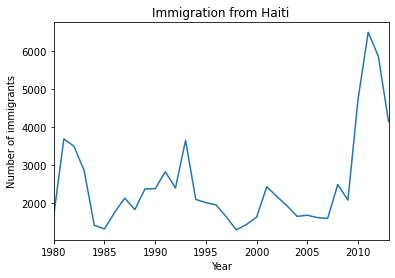

In [6]:
df_can.set_index('OdName', inplace=True)

years = list(map(int, range(1980, 2014)))

df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

-----------------

### Apply a style to Matplotlib

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
# using ggplot style
mpl.style.use(['ggplot'])

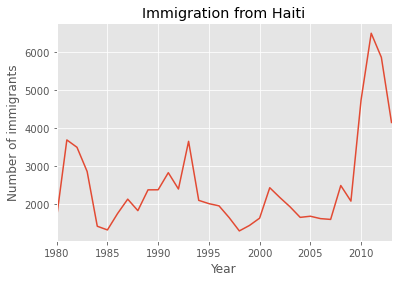

In [9]:
df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

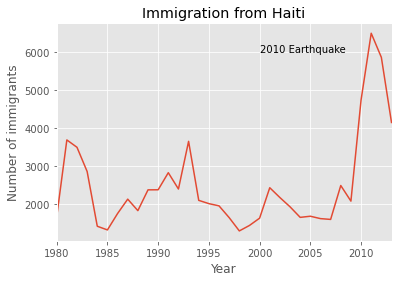

In [10]:
df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

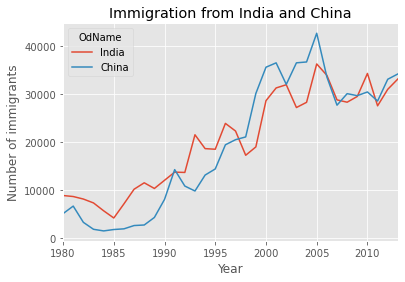

In [11]:
df_can.loc[['India', 'China'], years].transpose().plot(kind='line')
plt.title('Immigration from India and China')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

*Pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis!

Why we didn't need to transpose Haiti's dataframe before plotting?
Because `df_can.loc['Haiti', years]` is a series as opposed to a dataframe and has the years as its indices.

In [12]:
df_can.loc['Haiti', years].head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [13]:
df_can.loc[['India','China'], years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [14]:
## top 5 countries
# create a total column
df_can['Total'] = df_can.sum(axis=1)

# sort by total
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


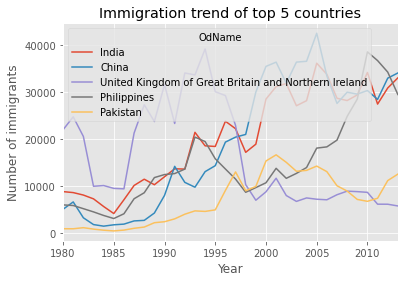

In [15]:
df_top5.plot(kind='line')
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

--------------

### Other types of plots

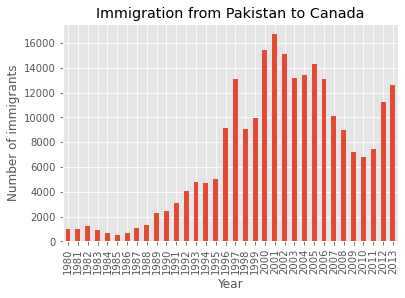

In [16]:
# bar plot
df_pak = df_can.loc['Pakistan', years]
df_pak.plot(kind='bar')
plt.title('Immigration from Pakistan to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

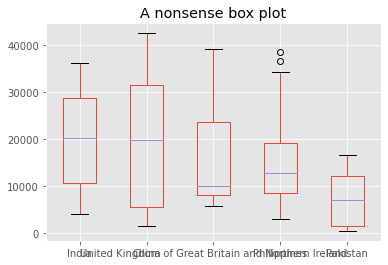

In [17]:
# box plot
df_top5.plot(kind='box')
plt.title('A nonsense box plot')
plt.show()

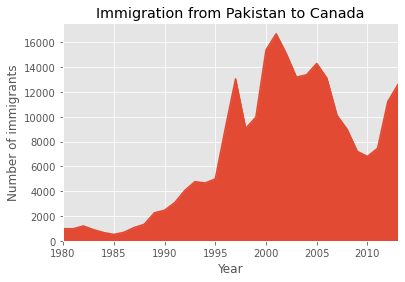

In [18]:
# area plot
df_pak.plot(kind='area')
plt.title('Immigration from Pakistan to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.show()

In [19]:
df_can.columns

Index([    'Type', 'Coverage',     'AREA', 'AreaName',      'REG',  'RegName',
            'DEV',  'DevName',       1980,       1981,       1982,       1983,
             1984,       1985,       1986,       1987,       1988,       1989,
             1990,       1991,       1992,       1993,       1994,       1995,
             1996,       1997,       1998,       1999,       2000,       2001,
             2002,       2003,       2004,       2005,       2006,       2007,
             2008,       2009,       2010,       2011,       2012,       2013,
          'Total'],
      dtype='object')

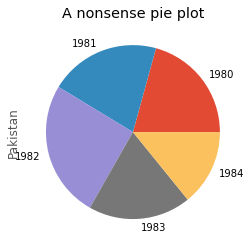

In [20]:
# pie plot
df_pak[0:5].plot(kind='pie')
plt.title('A nonsense pie plot')
plt.show()